In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = 10, 6.5
plt.style.use('bmh')

In [3]:
wire_ws = np.array([38, 50, 76, 100, 120, 150]) * 1e-6
fringe_ws = np.array([39.52675,
 29.636200000000002,
 20.390840000000004,
 16.005675,
 13.3912375,
 10.847700000000001]) * 1e-3

In [4]:
D = 2.25

In [5]:
lambd = 650 * 1e-9

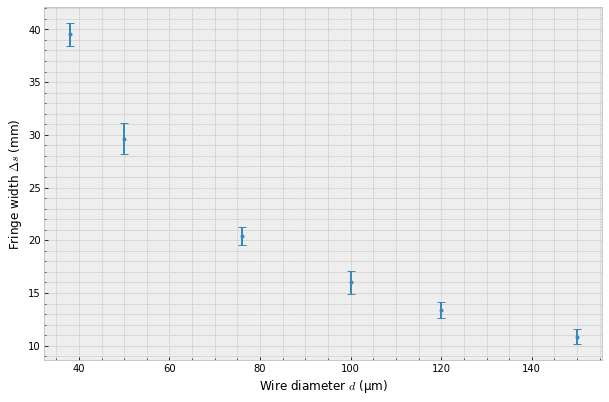

In [6]:
plt.errorbar(wire_ws * 1e6, fringe_ws * 1e3, yerr=np.array([1.075835955199492,
 1.488900000000001,
 0.856218412789634,
 1.056832222670656,
 0.750701356961442,
 0.7090000000000006]), fmt='.', capsize=4)

plt.xlabel("Wire diameter $d$ (µm)")
plt.ylabel("Fringe width $\Delta s$ (mm)")

plt.minorticks_on()

plt.grid(which='minor')

plt.savefig('processed-data/ds_vs_d.png', dpi=160, bbox_inches='tight')

In [7]:
from scipy.stats import linregress

In [8]:
slope, intercept, r_value, _, stderr = linregress(1 / (wire_ws*1e6), fringe_ws*1e3)

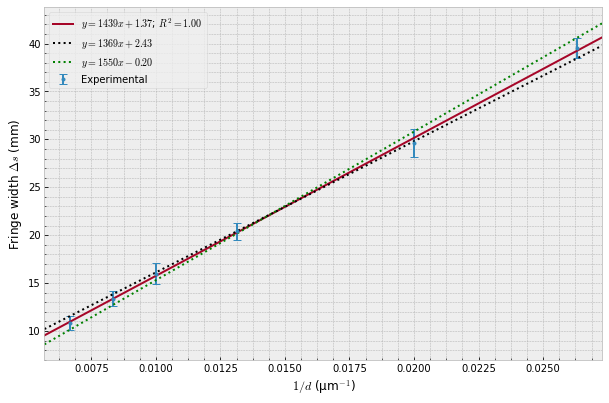

In [9]:
plt.figure()
plt.errorbar(1 / wire_ws/1e6, fringe_ws*1e3, yerr=np.array([1.074318556108942,
 1.4867999999999988,
 0.8550107704584781,
 1.0553416271520804,
 0.7496425398148107,
 0.7080000000000002]), fmt='.', label='Experimental', capsize=4)

l, r = plt.xlim()
xs = np.linspace(l, r)

plt.plot(xs, slope * xs + intercept, '-', label=f"$y = {slope:.0f} x + {intercept:.2f}$; $R^2 = {r_value**2:.2f}$")
smax, imax, *_ = linregress([1/38, 1/150], [39.52675 - 1.075835955199492, 10.847700000000001 + 0.7090000000000006])
smin, imin, *_ = linregress([1/38, 1/150], [39.52675 + 1.075835955199492, 10.847700000000001 - 0.7090000000000006])

plt.plot(xs, smax * xs + imax, ':k', label=f"$y = {smax:.0f} x + {imax:.2f}$")
plt.plot(xs, smin * xs + imin, ':g', label=f"$y = {smin:.0f} x {imin:.2f}$")

plt.xlim(l, r)

plt.xlabel("$1/d$ (µm$^{-1}$)")
plt.ylabel("Fringe width $\Delta s$ (mm)")

plt.minorticks_on()
plt.grid(which='minor')

plt.legend()

plt.savefig('processed-data/ds_vs_d_lin.png', dpi=160, bbox_inches='tight')

In [10]:
slope

1439.314627931176

In [11]:
slope*1e-9 / D * 1e9

639.6953901916338

In [12]:
slope*1e-9 / lambd

2.214330196817194

In [13]:
er_slope = abs(smax - smin) / 2
er_slope

90.83540129140295

In [20]:
er = er_slope/slope + 0.010/2.250
er

0.06755462169732682

In [18]:
er * (slope/D)

43.21438008591968

In [16]:
intercept

1.3690321900917723